# Nota

Este jupyter notebook no es el correcto. Fue un primer intento de análisis, pero no lo realicé correctamente. He decidido dejarlo como constancia del trabajo pero el correcto es analisis_bien.ipynb.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Ruta de la carpeta donde se encuentran los archivos CSV
folder_path = 'datos_limpios'

# Lista de nombres de archivos CSV para las temporadas 2016/2017 hasta 2022/2023
file_names = [f'{folder_path}/champions_{year}_{year+1}.csv' for year in range(2016, 2023)]

# Leer cada archivo CSV y almacenar los DataFrames en una lista
dfs = [pd.read_csv(file, delimiter=',') for file in file_names]

# Concatenar los DataFrames en uno solo
df_all = pd.concat(dfs, ignore_index=True)

In [3]:
df_all

,SEASON,HOME_TEAM,AWAY_TEAM,HT_SCORE,AW_SCORE
0,2016,FC Basel,PFC Ludogorets Razgrad,1,1
1,2016,Paris Saint-Germain,Arsenal FC,1,1
2,2016,Arsenal FC,FC Basel,2,0
3,2016,PFC Ludogorets Razgrad,Paris Saint-Germain,1,3
4,2016,Arsenal FC,PFC Ludogorets Razgrad,6,0
...,...,...,...,...,...
864,2022,Paris Saint-Germain,Juventus,2,1
865,2022,RB Salzburg,AC Milan,1,1
866,2022,Celtic FC,Real Madrid,0,3
867,2022,Dinamo Zagreb,Chelsea FC,1,0


In [4]:
#estadisticas generales
partidos_totales = df_all.shape[0]
equipos_totales = pd.concat([df_all['HOME_TEAM'], df_all['AWAY_TEAM']]).nunique()

print(f'Partidos totales: {partidos_totales}')
print(f'Equipos totales: {equipos_totales}')

Partidos totales: 869
Equipos totales: 78


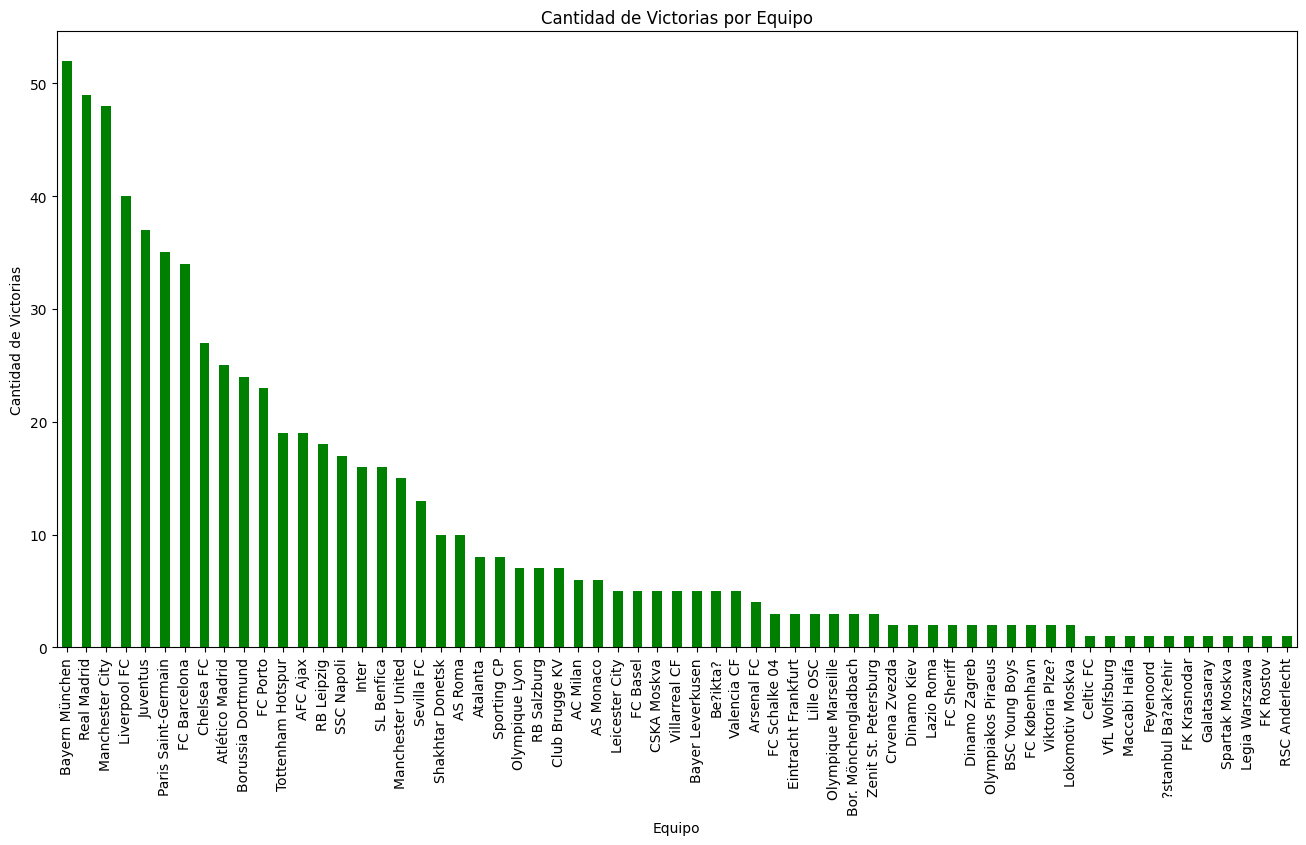

In [5]:
#Grafico de barras para cantidad de victorias por equipo
plt.figure(figsize=(16, 8))
victorias = pd.concat([df_all['HOME_TEAM'][df_all['HT_SCORE'] > df_all['AW_SCORE']], df_all['AWAY_TEAM'][df_all['HT_SCORE'] < df_all['AW_SCORE']]]).value_counts()
victorias.plot(kind='bar', color='green')
plt.title('Cantidad de Victorias por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Victorias')
plt.show()

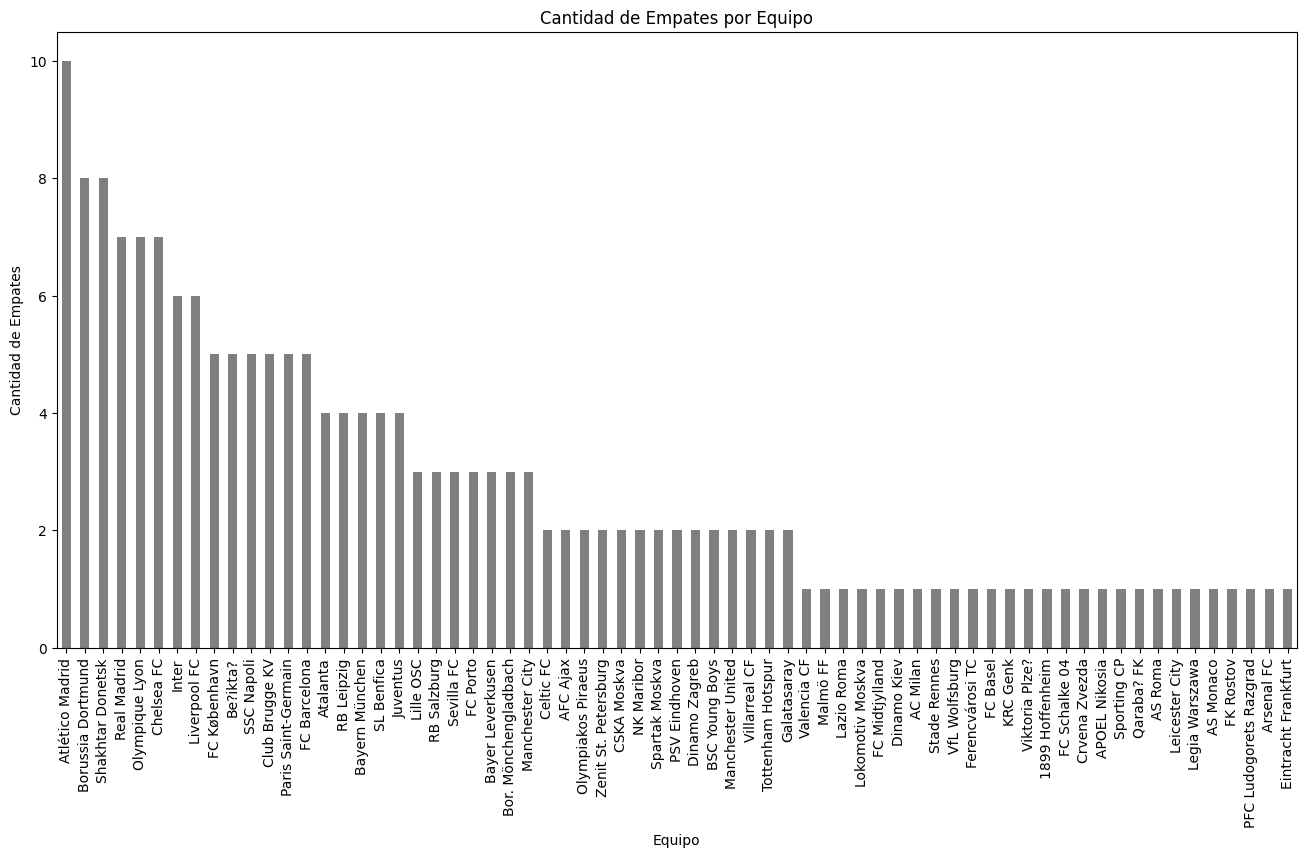

In [6]:
#Grafico de barras para cantidad de empates por equipo
plt.figure(figsize=(16, 8))
empates = df_all[df_all['HT_SCORE'] == df_all['AW_SCORE']]['HOME_TEAM'].value_counts()
empates.plot(kind='bar', color='gray')
plt.title('Cantidad de Empates por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Empates')
plt.show()

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


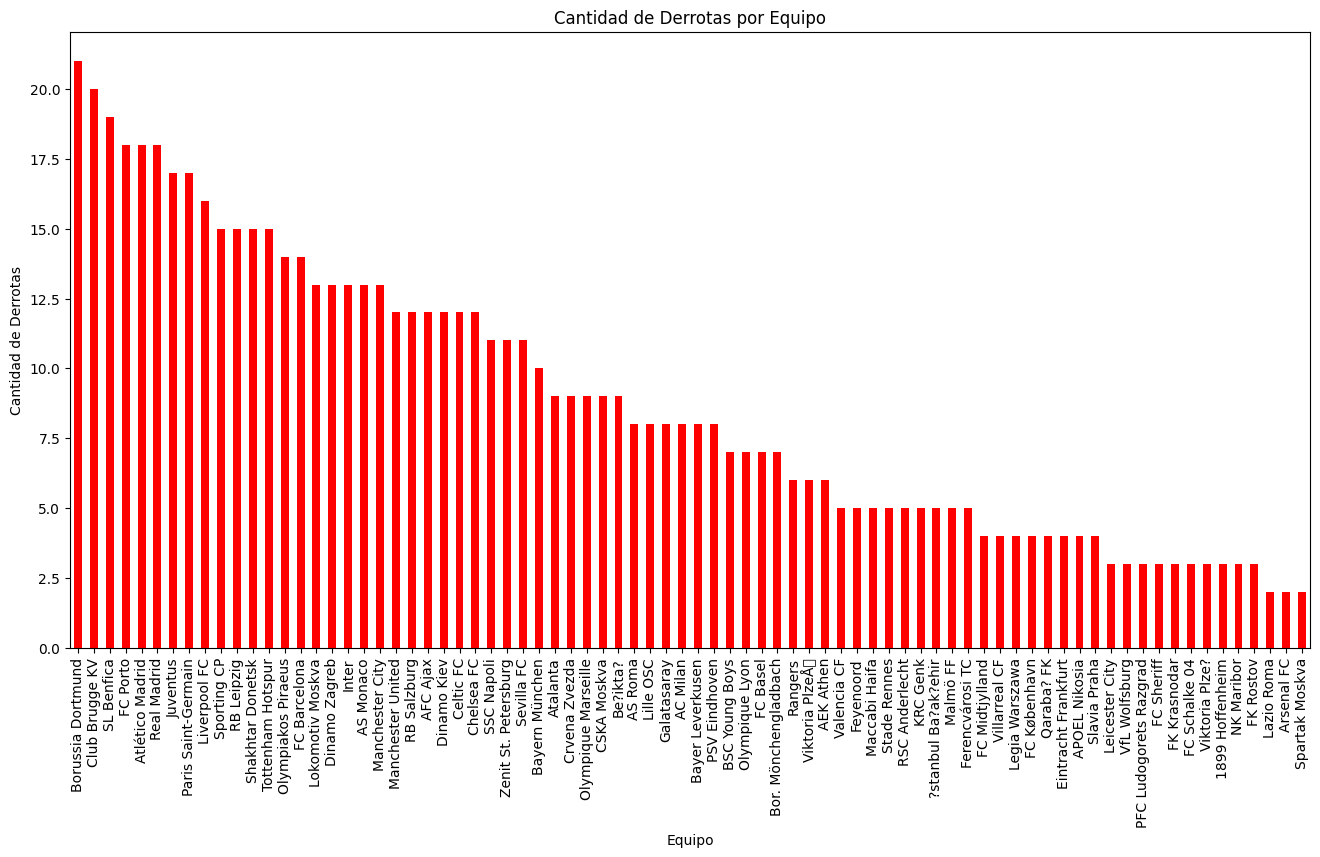

In [7]:
#grafico de barras para cantidad de derrotas por equipo
plt.figure(figsize=(16, 8))
derrotas = pd.concat([df_all['HOME_TEAM'][df_all['HT_SCORE'] < df_all['AW_SCORE']], df_all['AWAY_TEAM'][df_all['HT_SCORE'] > df_all['AW_SCORE']]]).value_counts()
derrotas.plot(kind='bar', color='red')
plt.title('Cantidad de Derrotas por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Derrotas')
plt.show()

Media de goles por partido: 3.05


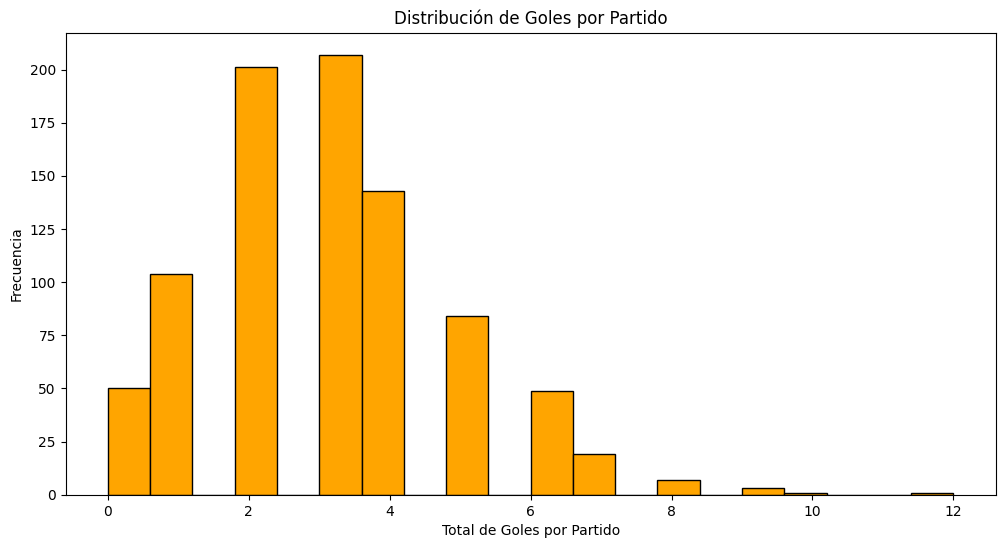

In [8]:
#analisis de goles por partido
df_all['Goles Totales'] = df_all['HT_SCORE'] + df_all['AW_SCORE']
media_goles_partido = df_all['Goles Totales'].mean()

print(f"Media de goles por partido: {media_goles_partido:.2f}")

plt.figure(figsize=(12, 6))
df_all['Goles Totales'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title('Distribución de Goles por Partido')
plt.xlabel('Total de Goles por Partido')
plt.ylabel('Frecuencia')
plt.show()

In [9]:

# Rendimiento de equipos en casa y fuera
victorias_locales = df_all[df_all['HT_SCORE'] > df_all['AW_SCORE']]['HOME_TEAM'].value_counts()
victorias_visitantes = df_all[df_all['HT_SCORE'] < df_all['AW_SCORE']]['AWAY_TEAM'].value_counts()
empates_locales = df_all[df_all['HT_SCORE'] == df_all['AW_SCORE']]['HOME_TEAM'].value_counts()
empates_visitantes = df_all[df_all['HT_SCORE'] == df_all['AW_SCORE']]['AWAY_TEAM'].value_counts()
derrotas_locales = df_all[df_all['HT_SCORE'] < df_all['AW_SCORE']]['HOME_TEAM'].value_counts()
derrotas_visitantes = df_all[df_all['HT_SCORE'] > df_all['AW_SCORE']]['AWAY_TEAM'].value_counts()



# Crear un DataFrame con los datos
df_rendimiento = pd.DataFrame({
    'Victorias Locales': victorias_locales,
    'Victorias Visitantes': victorias_visitantes,
    'Empates Locales': empates_locales,
    'Empates Visitantes': empates_visitantes,
    'Derrotas Locales': derrotas_locales,
    'Derrotas Visitantes': derrotas_visitantes
})


df_rendimiento['Victorias Totales'] = df_rendimiento['Victorias Locales'] + df_rendimiento['Victorias Visitantes']
df_rendimiento['Empates Totales'] = df_rendimiento['Empates Locales'] + df_rendimiento['Empates Visitantes']
df_rendimiento['Derrotas Totales'] = df_rendimiento['Derrotas Locales'] + df_rendimiento['Derrotas Visitantes']

df_rendimiento['Partidos Totales'] = df_rendimiento['Victorias Totales'] + df_rendimiento['Empates Totales'] + df_rendimiento['Derrotas Totales']
df_rendimiento['Porcentage Victoria'] = (df_rendimiento['Victorias Totales'] / df_rendimiento['Partidos Totales']) * 100
df_rendimiento['Porcentage Empate'] = (df_rendimiento['Empates Totales'] / df_rendimiento['Partidos Totales']) * 100
df_rendimiento['Porcentage Derrota'] = (df_rendimiento['Derrotas Totales'] / df_rendimiento['Partidos Totales']) * 100

df_rendimiento.sort_values(by='Porcentage Victoria', ascending=False, inplace=True)

#Rellenar los valores nulos por 0
df_rendimiento.fillna(0, inplace=True)
print('Rendimiento de equipos:')
df_rendimiento.info()
df_rendimiento.head(78)

Rendimiento de equipos:
<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, Bayern München to Zenit St. Petersburg
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Victorias Locales     78 non-null     float64
 1   Victorias Visitantes  78 non-null     float64
 2   Empates Locales       78 non-null     float64
 3   Empates Visitantes    78 non-null     float64
 4   Derrotas Locales      78 non-null     float64
 5   Derrotas Visitantes   78 non-null     int64  
 6   Victorias Totales     78 non-null     float64
 7   Empates Totales       78 non-null     float64
 8   Derrotas Totales      78 non-null     float64
 9   Partidos Totales      78 non-null     float64
 10  Porcentage Victoria   78 non-null     float64
 11  Porcentage Empate     78 non-null     float64
 12  Porcentage Derrota    78 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 8.5+ KB


,Victorias Locales,Victorias Visitantes,Empates Locales,Empates Visitantes,Derrotas Locales,Derrotas Visitantes,Victorias Totales,Empates Totales,Derrotas Totales,Partidos Totales,Porcentage Victoria,Porcentage Empate,Porcentage Derrota
Bayern München,26.0,26.0,4.0,5.0,4.0,6,52.0,9.0,10.0,71.0,73.239437,12.676056,14.084507
Manchester City,31.0,17.0,3.0,11.0,5.0,8,48.0,14.0,13.0,75.0,64.000000,18.666667,17.333333
Real Madrid,25.0,24.0,7.0,5.0,7.0,11,49.0,12.0,18.0,79.0,62.025316,15.189873,22.784810
Liverpool FC,21.0,19.0,6.0,3.0,5.0,11,40.0,9.0,16.0,65.0,61.538462,13.846154,24.615385
Juventus,20.0,17.0,4.0,5.0,8.0,9,37.0,9.0,17.0,63.0,58.730159,14.285714,26.984127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stade Rennes,0.0,0.0,1.0,0.0,2.0,3,0.0,0.0,5.0,0.0,0.000000,0.000000,0.000000
VfL Wolfsburg,1.0,0.0,1.0,1.0,1.0,2,0.0,2.0,3.0,0.0,0.000000,0.000000,0.000000
Viktoria Plze?,1.0,1.0,1.0,0.0,1.0,2,2.0,0.0,3.0,0.0,0.000000,0.000000,0.000000
Viktoria PlzeÅ,0.0,0.0,0.0,0.0,3.0,3,0.0,0.0,6.0,0.0,0.000000,0.000000,0.000000


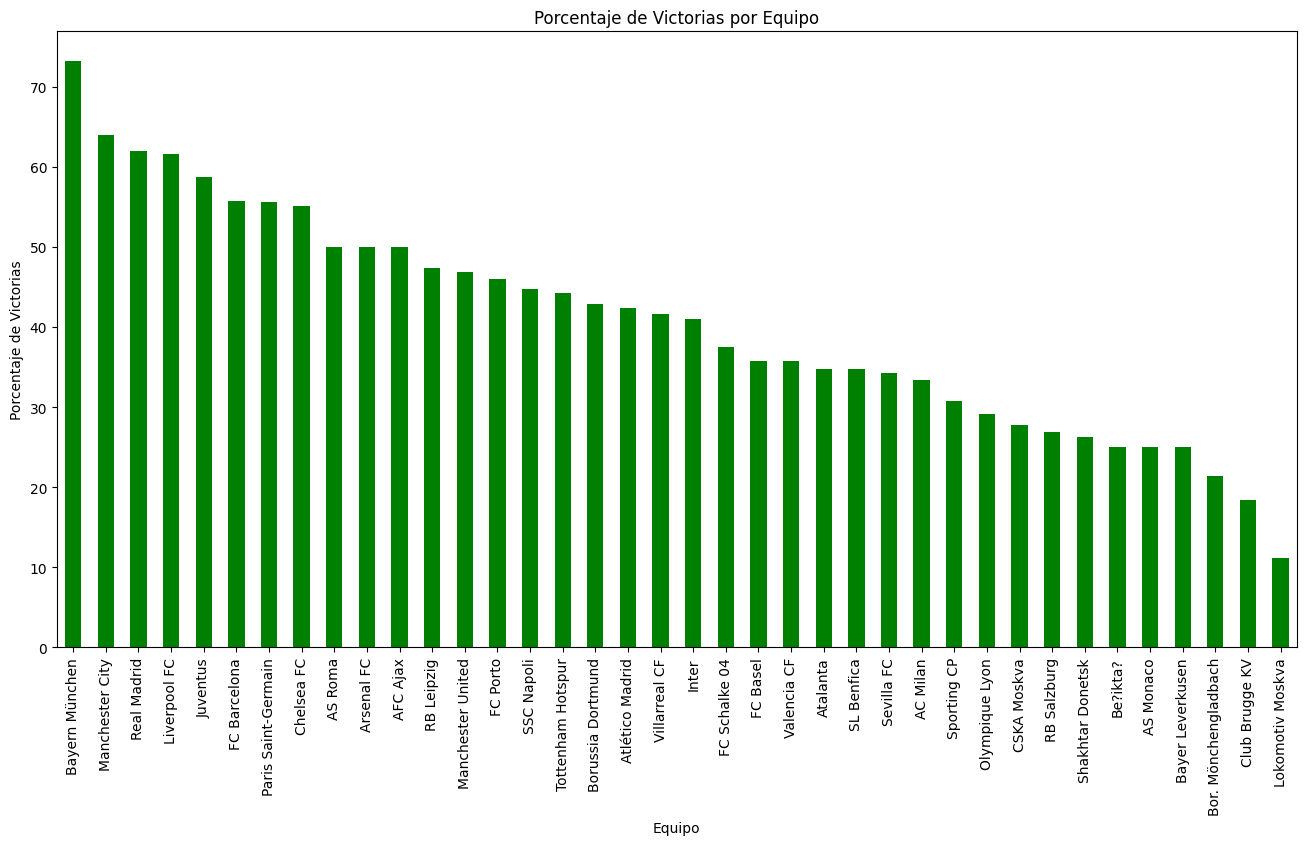

In [10]:
#Grafico de barras para el porcentaje de victorias
plt.figure(figsize=(16, 8))
df_rendimiento['Porcentage Victoria'].head(38).plot(kind='bar', color='green')
plt.title('Porcentaje de Victorias por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Victorias')
plt.show()

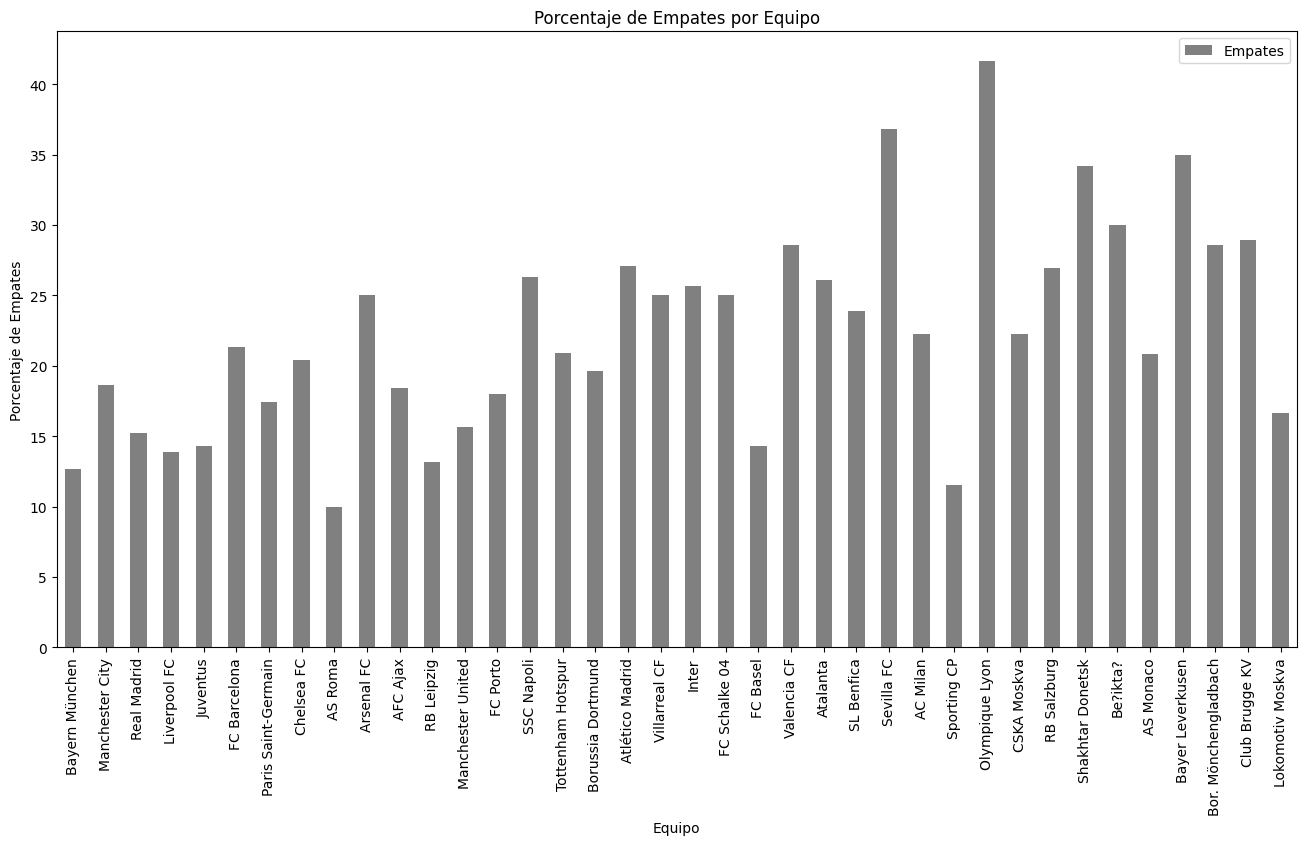

In [11]:
#Grafico de barras para el porcentaje de empates
plt.figure(figsize=(16, 8))
df_rendimiento['Porcentage Empate'].head(38).plot(kind='bar', color='gray')
plt.title('Porcentaje de Empates por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Empates')
plt.legend(['Empates'])
plt.show()

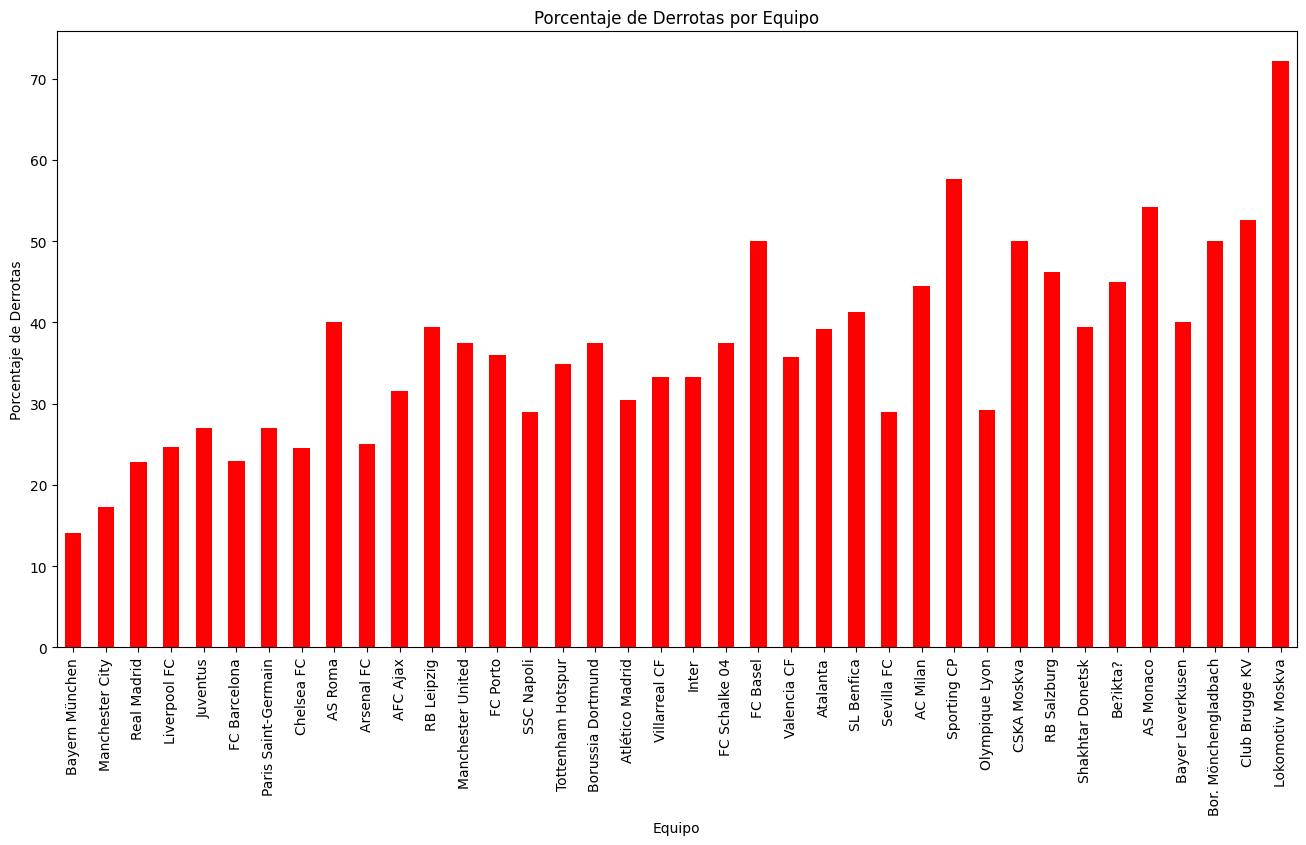

In [12]:
#Grafico de barras para el porcentaje de derrotas
plt.figure(figsize=(16, 8))
df_rendimiento['Porcentage Derrota'].head(38).plot(kind='bar', color='red')
plt.title('Porcentaje de Derrotas por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Derrotas')
plt.show()


# REGRESIÓN LINEAL

Predecir el vencedor de la champions 2023/2024


Un enfoque más adecuado podría ser utilizar un modelo de clasificación, como la regresión logística, los árboles de decisión o las máquinas de vectores de soporte. Estos modelos son capaces de manejar variables de salida categóricas y podrían proporcionar una predicción más precisa en este contexto.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [14]:


df_rendimiento

,Victorias Locales,Victorias Visitantes,Empates Locales,Empates Visitantes,Derrotas Locales,Derrotas Visitantes,Victorias Totales,Empates Totales,Derrotas Totales,Partidos Totales,Porcentage Victoria,Porcentage Empate,Porcentage Derrota
Bayern München,26.0,26.0,4.0,5.0,4.0,6,52.0,9.0,10.0,71.0,73.239437,12.676056,14.084507
Manchester City,31.0,17.0,3.0,11.0,5.0,8,48.0,14.0,13.0,75.0,64.000000,18.666667,17.333333
Real Madrid,25.0,24.0,7.0,5.0,7.0,11,49.0,12.0,18.0,79.0,62.025316,15.189873,22.784810
Liverpool FC,21.0,19.0,6.0,3.0,5.0,11,40.0,9.0,16.0,65.0,61.538462,13.846154,24.615385
Juventus,20.0,17.0,4.0,5.0,8.0,9,37.0,9.0,17.0,63.0,58.730159,14.285714,26.984127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stade Rennes,0.0,0.0,1.0,0.0,2.0,3,0.0,0.0,5.0,0.0,0.000000,0.000000,0.000000
VfL Wolfsburg,1.0,0.0,1.0,1.0,1.0,2,0.0,2.0,3.0,0.0,0.000000,0.000000,0.000000
Viktoria Plze?,1.0,1.0,1.0,0.0,1.0,2,2.0,0.0,3.0,0.0,0.000000,0.000000,0.000000
Viktoria PlzeÅ,0.0,0.0,0.0,0.0,3.0,3,0.0,0.0,6.0,0.0,0.000000,0.000000,0.000000


In [15]:
df_all.to_csv('datos_limpios/df_all.csv', index=False)

In [16]:
df_rendimiento
df_rendimiento.to_csv('datos_limpios/df_rendimiento.csv', index=True)

In [17]:
import pandas as pd

# Crear DataFrame con los partidos de la primera jornada
resultados = {
    'FC København': [1, 'Manchester City', 3],
    'RB Leipzig': [0, 'Real Madrid', 1],
    'Paris Saint-Germain': [2, 'Real sociedad', 0],
    'Lazio Roma': [1, 'Bayern München', 0],
    'PSV Eindhoven': [1, 'Borussia Dortmund', 1],
    'Inter': [1, 'Atlético Madrid', 0],
    'FC Porto': [1, 'Arsenal FC', 0],
    'SSC Napoli': [1, 'FC Barcelona', 1],
}

# Crear DataFrame de la primera jornada
df_partidos = pd.DataFrame(resultados).T.reset_index()
df_partidos.columns = ['HOME_TEAM', 'HT_SCORE', 'AWAY_TEAM', 'AW_SCORE']

# Añadir la columna 'SEASON'
df_partidos['SEASON'] = 2023

# Calcular el porcentaje de victorias para cada equipo
df_partidos['Porcentage Victoria'] = df_partidos.apply(lambda row: df_rendimiento.loc[row['HOME_TEAM'], 'Porcentage Victoria'], axis=1)

# Calcular el porcentaje de empates para cada equipo
df_partidos['Porcentage Empate'] = df_partidos.apply(lambda row: df_rendimiento.loc[row['HOME_TEAM'], 'Porcentage Empate'], axis=1)

# Calcular el porcentaje de derrotas para cada equipo
df_partidos['Porcentage Derrota'] = df_partidos.apply(lambda row: df_rendimiento.loc[row['HOME_TEAM'], 'Porcentage Derrota'], axis=1)



# Imprimir el DataFrame de la primera jornada
df_partidos



,HOME_TEAM,HT_SCORE,AWAY_TEAM,AW_SCORE,SEASON,Porcentage Victoria,Porcentage Empate,Porcentage Derrota
0,FC København,1,Manchester City,3,2023,0.000000,0.000000,0.000000
1,RB Leipzig,0,Real Madrid,1,2023,47.368421,13.157895,39.473684
2,Paris Saint-Germain,2,Real sociedad,0,2023,55.555556,17.460317,26.984127
3,Lazio Roma,1,Bayern München,0,2023,0.000000,0.000000,0.000000
4,PSV Eindhoven,1,Borussia Dortmund,1,2023,0.000000,0.000000,0.000000
5,Inter,1,Atlético Madrid,0,2023,41.025641,25.641026,33.333333
6,FC Porto,1,Arsenal FC,0,2023,46.000000,18.000000,36.000000
7,SSC Napoli,1,FC Barcelona,1,2023,44.736842,26.315789,28.947368


In [18]:
df_rendimiento

,Victorias Locales,Victorias Visitantes,Empates Locales,Empates Visitantes,Derrotas Locales,Derrotas Visitantes,Victorias Totales,Empates Totales,Derrotas Totales,Partidos Totales,Porcentage Victoria,Porcentage Empate,Porcentage Derrota
Bayern München,26.0,26.0,4.0,5.0,4.0,6,52.0,9.0,10.0,71.0,73.239437,12.676056,14.084507
Manchester City,31.0,17.0,3.0,11.0,5.0,8,48.0,14.0,13.0,75.0,64.000000,18.666667,17.333333
Real Madrid,25.0,24.0,7.0,5.0,7.0,11,49.0,12.0,18.0,79.0,62.025316,15.189873,22.784810
Liverpool FC,21.0,19.0,6.0,3.0,5.0,11,40.0,9.0,16.0,65.0,61.538462,13.846154,24.615385
Juventus,20.0,17.0,4.0,5.0,8.0,9,37.0,9.0,17.0,63.0,58.730159,14.285714,26.984127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stade Rennes,0.0,0.0,1.0,0.0,2.0,3,0.0,0.0,5.0,0.0,0.000000,0.000000,0.000000
VfL Wolfsburg,1.0,0.0,1.0,1.0,1.0,2,0.0,2.0,3.0,0.0,0.000000,0.000000,0.000000
Viktoria Plze?,1.0,1.0,1.0,0.0,1.0,2,2.0,0.0,3.0,0.0,0.000000,0.000000,0.000000
Viktoria PlzeÅ,0.0,0.0,0.0,0.0,3.0,3,0.0,0.0,6.0,0.0,0.000000,0.000000,0.000000


In [19]:
columnas_relevantes = ['Porcentage Victoria', 'Porcentage Empate', 'Porcentage Derrota']
df_entrenamiento = df_rendimiento[columnas_relevantes]

In [20]:
df_partidos

,HOME_TEAM,HT_SCORE,AWAY_TEAM,AW_SCORE,SEASON,Porcentage Victoria,Porcentage Empate,Porcentage Derrota
0,FC København,1,Manchester City,3,2023,0.000000,0.000000,0.000000
1,RB Leipzig,0,Real Madrid,1,2023,47.368421,13.157895,39.473684
2,Paris Saint-Germain,2,Real sociedad,0,2023,55.555556,17.460317,26.984127
3,Lazio Roma,1,Bayern München,0,2023,0.000000,0.000000,0.000000
4,PSV Eindhoven,1,Borussia Dortmund,1,2023,0.000000,0.000000,0.000000
5,Inter,1,Atlético Madrid,0,2023,41.025641,25.641026,33.333333
6,FC Porto,1,Arsenal FC,0,2023,46.000000,18.000000,36.000000
7,SSC Napoli,1,FC Barcelona,1,2023,44.736842,26.315789,28.947368


In [21]:
#importar linerregression
from sklearn.linear_model import LinearRegression


# Añadir columna de resultados ('Ganador') al DataFrame de entrenamiento
df_entrenamiento['Ganador'] = df_rendimiento['Victorias Totales'] > df_rendimiento['Derrotas Totales']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df_entrenamiento[columnas_relevantes],
    df_entrenamiento['Ganador'],
    test_size=0.2,
    random_state=42
)

# Inicializar y entrenar el modelo de regresión logística
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
predicciones_logisticas = modelo_logistico.predict(X_test)

# Evaluar el rendimiento del modelo logístico
accuracy_logistico = accuracy_score(y_test, predicciones_logisticas)
conf_matrix_logistico = confusion_matrix(y_test, predicciones_logisticas)
class_report_logistico = classification_report(y_test, predicciones_logisticas)

print(f'Accuracy del modelo logístico: {accuracy_logistico:.2%}')
print(f'Confusion Matrix del modelo logístico:\n{conf_matrix_logistico}')
print(f'Classification Report del modelo logístico:\n{class_report_logistico}')

# Predecir ganador de la Champions 2023
# Seleccionar características relevantes para la predicción
columnas_relevantes_prediccion = ['Porcentage Victoria', 'Porcentage Empate', 'Porcentage Derrota']

# Hacer predicciones para los datos de la Champions 2023
predicciones_champions = modelo_logistico.predict(df_partidos[columnas_relevantes_prediccion])

# Imprimir las predicciones para los partidos de la Champions 2023
df_partidos['Prediccion_Ganador'] = predicciones_champions
print("\nPredicciones para los partidos de la Champions 2023:")
print(df_partidos[['HOME_TEAM', 'AWAY_TEAM', 'Prediccion_Ganador']])

Accuracy del modelo logístico: 100.00%
Confusion Matrix del modelo logístico:
[[11  0]
 [ 0  5]]
Classification Report del modelo logístico:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        11
        True       1.00      1.00      1.00         5

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Predicciones para los partidos de la Champions 2023:
             HOME_TEAM          AWAY_TEAM  Prediccion_Ganador
0         FC København    Manchester City               False
1           RB Leipzig        Real Madrid                True
2  Paris Saint-Germain      Real sociedad                True
3           Lazio Roma     Bayern München               False
4        PSV Eindhoven  Borussia Dortmund               False
5                Inter    Atlético Madrid                True
6             FC Porto         Arsenal FC   

C:\Users\alvde\AppData\Local\Temp\ipykernel_22212\996215807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entrenamiento['Ganador'] = df_rendimiento['Victorias Totales'] > df_rendimiento['Derrotas Totales']
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:

In [22]:
df_partidos

,HOME_TEAM,HT_SCORE,AWAY_TEAM,AW_SCORE,SEASON,Porcentage Victoria,Porcentage Empate,Porcentage Derrota,Prediccion_Ganador
0,FC København,1,Manchester City,3,2023,0.000000,0.000000,0.000000,False
1,RB Leipzig,0,Real Madrid,1,2023,47.368421,13.157895,39.473684,True
2,Paris Saint-Germain,2,Real sociedad,0,2023,55.555556,17.460317,26.984127,True
3,Lazio Roma,1,Bayern München,0,2023,0.000000,0.000000,0.000000,False
4,PSV Eindhoven,1,Borussia Dortmund,1,2023,0.000000,0.000000,0.000000,False
5,Inter,1,Atlético Madrid,0,2023,41.025641,25.641026,33.333333,True
6,FC Porto,1,Arsenal FC,0,2023,46.000000,18.000000,36.000000,True
7,SSC Napoli,1,FC Barcelona,1,2023,44.736842,26.315789,28.947368,True
